In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%cd c:\Users\CARNOT\Water_Portability_Prediction

c:\Users\CARNOT\Water_Portability_Prediction


In [3]:
df = pd.read_csv(r"data\raw\water_potability.csv")

In [4]:
X = df.drop(columns="Potability")
y = df["Potability"]

In [5]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=234)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [12]:
print(y_train.shape)
print(y_test.shape)

(2620,)
(656,)


In [13]:
y_train.value_counts(normalize=True)

0    0.609924
1    0.390076
Name: Potability, dtype: float64

In [6]:
# imblance
def imblearn(X_train, y_train):
    imputer = SimpleImputer(strategy="median")
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    imb = SMOTE(random_state=234, k_neighbors=10)
    X_train, y_train = imb.fit_resample(X_train, y_train)
    return X_train, y_train

In [7]:
X_train, y_train = imblearn(X_train=X_train, y_train=y_train)

In [20]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Potability, dtype: float64

In [8]:
# standard scaling
scaler = StandardScaler()

In [9]:
# Imputer
imputer = SimpleImputer(strategy="median")

In [10]:
# random forest model
model_rf = RandomForestClassifier(random_state=234)

In [10]:
# xgboost model
model_xgb = XGBClassifier(random_state=234)

In [11]:
# lightgbm model
model_lgbm = LGBMClassifier(random_state=234)

In [40]:
# Extra tree
model_extra_tree = ExtraTreeClassifier(random_state=234)
clf = BaggingClassifier(model_extra_tree, random_state=234)

In [11]:
# random forest pipeline
pipe_rf = make_pipeline(imputer, scaler, model_rf)

In [12]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=234))])

In [26]:
print(classification_report(y_test, pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       400
           1       0.58      0.51      0.54       256

    accuracy                           0.66       656
   macro avg       0.64      0.64      0.64       656
weighted avg       0.66      0.66      0.66       656



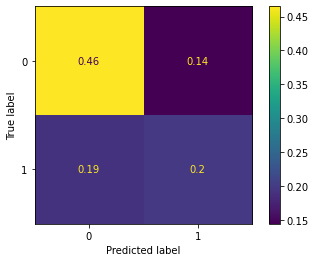

In [29]:
ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test, normalize='all')

In [30]:
# random forest pipeline
pipe_xgb = make_pipeline(imputer, scaler, model_xgb)

In [31]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=234, reg_alpha=0,
                               reg_lambda=1, ...))])

In [32]:
print(classification_report(y_test, pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       400
           1       0.52      0.54      0.53       256

    accuracy                           0.63       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.63      0.63      0.63       656



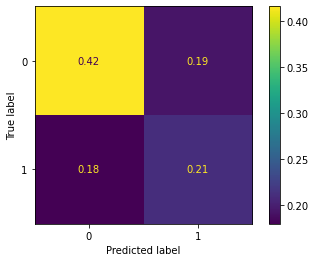

In [33]:
ConfusionMatrixDisplay.from_estimator(pipe_xgb, X_test, y_test, normalize='all')

In [34]:
# random forest pipeline
pipe_lgbm = make_pipeline(imputer, scaler, model_lgbm)

In [35]:
pipe_lgbm.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier(random_state=234))])

In [36]:
print(classification_report(y_test, pipe_lgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       400
           1       0.53      0.54      0.53       256

    accuracy                           0.63       656
   macro avg       0.61      0.62      0.61       656
weighted avg       0.63      0.63      0.63       656



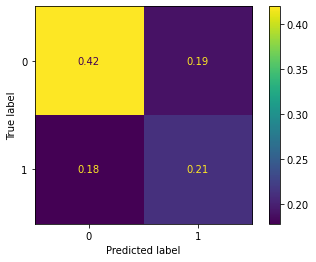

In [37]:
ConfusionMatrixDisplay.from_estimator(pipe_lgbm, X_test, y_test, normalize='all')

In [41]:
# random forest pipeline
pipe_extra_tree = make_pipeline(imputer, scaler, clf)

In [42]:
pipe_extra_tree.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=ExtraTreeClassifier(random_state=234),
                                   random_state=234))])

In [43]:
print(classification_report(y_test, pipe_extra_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71       400
           1       0.53      0.46      0.49       256

    accuracy                           0.63       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.63      0.62       656



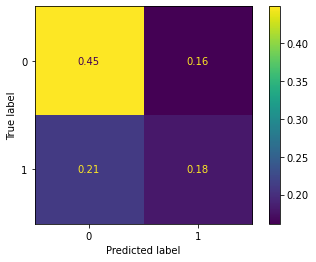

In [44]:
ConfusionMatrixDisplay.from_estimator(pipe_extra_tree, X_test, y_test, normalize='all')

In [46]:
estimators = [("rf", pipe_rf), 
              ("lgbm", pipe_lgbm), 
              ("xgb", pipe_xgb), 
              ("extra_tree", pipe_extra_tree)
              ]
stack = StackingClassifier(estimators=estimators, final_estimator=pipe_rf, cv=10, verbose=0, n_jobs=-1)
stack.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                Pipeline(steps=[('simpleimputer',
                                                 SimpleImputer(strategy='median')),
                                                ('standardscaler',
                                                 StandardScaler()),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(random_state=234))])),
                               ('lgbm',
                                Pipeline(steps=[('simpleimputer',
                                                 SimpleImputer(strategy='median')),
                                                ('standardscaler',
                                                 StandardScaler()),
                                                ('lgbmclassifier',
                                                 LGBM...
                                                ('standardscaler',
                                                 StandardScaler()),
                                                ('baggingclassifier',
                                                 BaggingClassifier(base_estimator=ExtraTreeClassifier(random_state=234),
                                                                   random_state=234))]))],
                   final_estimator=Pipeline(steps=[('simpleimputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('standardscaler',
                                                    StandardScaler()),
                                                   ('randomforestclassifier',
                                                    RandomForestClassifier(random_state=234))]),
                   n_jobs=-1)

In [47]:
print(classification_report(y_test, stack.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       400
           1       0.52      0.48      0.50       256

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.62      0.62      0.62       656



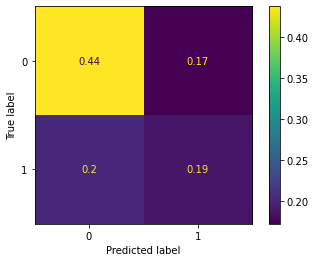

In [48]:
ConfusionMatrixDisplay.from_estimator(stack, X_test, y_test, normalize='all')